<a href="https://colab.research.google.com/github/eyaguirat10/CoWin-Breast-Cancer-Detection/blob/samar/MiniProjet_ML2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. Business Understanding**



  **Problem Statement:**
  
Le projet “Breast Cancer Detection” vise à concevoir un modèle de machine learning capable d’aider les médecins à distinguer les tumeurs bénignes des tumeurs malignes à partir de données médicales.


**BO (Business Objective):**
Améliorer la précision et la rapidité du diagnostic du cancer du sein pour réduire les erreurs médicales et faciliter la détection précoce.

**DSO (Data Science Objective):**
Développer un modèle de classification supervisée performant et interprétable, évalué selon les métriques de précision, rappel et AUC, et le comparer à d’autres modèles de référence.



**Success Criteria :**
Les succès seront mesurés par la qualité prédictive du modèle, son interprétabilité, et sa reproductibilité.




# **II. Data Understanding**

## **Importing librairies**

Importing libraries is essential because it provides access to pre-existing functions, methods, and tools, making data analysis easier.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **II.1. Data Loading**

This allows us to access the raw data and begin exploring its structure, missing values, and data types.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

file_path = "/content/drive/MyDrive/Dataset_ML/data.csv"

# Check if the file exists before trying to read it
if os.path.exists(file_path):
    try:
        # Try reading with utf-8 first (default)
        df = pd.read_csv(file_path)
        print(f"Successfully loaded CSV with utf-8: {df.shape[0]} rows, {df.shape[1]} columns")
    except UnicodeDecodeError:
        try:
            # If utf-8 fails, try latin-1
            df = pd.read_csv(file_path, encoding='latin-1')
            print(f"Successfully loaded CSV with latin-1: {df.shape[0]} rows, {df.shape[1]} columns")
        except Exception as e:
            print(f"Error loading CSV with latin-1: {e}")
            df = None # Ensure df is None if loading fails
    except Exception as e:
        print(f"An unexpected error occurred while loading CSV: {e}")
        df = None # Ensure df is None if loading fails
else:
    print(f"Error: The file was not found at {file_path}")
    df = None # Ensure df is None if file is not found

if df is not None:
    # Display the first few rows if the dataframe was loaded successfully
    display(df.head())

Successfully loaded CSV with utf-8: 569 rows, 33 columns


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## **II.2. Dataset Overview**

This step helps to quickly understand the structure and content of the dataset.

#### Basic information about the dataset

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


## **II.3. Missing Values Analysis**

In this step, we calculate how many missing (null) values exist in each column of the dataset. This information is important because columns with many missing values may need special handling, such as imputation or removal, to ensure the quality of our analysis and models.

In [ ]:
info_df = pd.DataFrame({
        'Column': df.columns,
        'Non_Null_Count': df.count(),
        'Null_Count': df.isnull().sum(),
        'Missing_%': (df.isnull().sum() / len(df) * 100).round(2)
    })
print(info_df.to_string(index=False))


                 Column  Non_Null_Count  Null_Count  Missing_%
                     id             569           0        0.0
              diagnosis             569           0        0.0
            radius_mean             569           0        0.0
           texture_mean             569           0        0.0
         perimeter_mean             569           0        0.0
              area_mean             569           0        0.0
        smoothness_mean             569           0        0.0
       compactness_mean             569           0        0.0
         concavity_mean             569           0        0.0
    concave points_mean             569           0        0.0
          symmetry_mean             569           0        0.0
 fractal_dimension_mean             569           0        0.0
              radius_se             569           0        0.0
             texture_se             569           0        0.0
           perimeter_se             569           0    

## **II.4. Categorical Variables Analysis**

This step focuses on analyzing categorical columns in the dataset. We first identify columns with object or category data types.

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_cols) > 0:
  print("CATEGORICAL COLUMNS SUMMARY:")
  for col in categorical_cols:
      unique_count = df[col].nunique()
      print(f"{col}: {unique_count} unique values")
      if unique_count <= 10:
         print(f"   Values: {df[col].value_counts().head().to_dict()}")
      else:
         print(f"   Top 5: {df[col].value_counts().head().to_dict()}")
      print()

CATEGORICAL COLUMNS SUMMARY:
diagnosis: 2 unique values
   Values: {'B': 357, 'M': 212}



## **II.5. Duplicate Analysis**

In this step, we check the dataset for duplicate rows. Duplicate records can skew analysis and models by overrepresenting certain data points.

In [ ]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage: {(duplicate_count/len(df)*100):.2f}%")
print()


Number of duplicate rows: 0



## **II.6. Data Visualization**

Boxplots are used to visualize the distribution of numerical data and detect outliers. They display the median, quartiles, and potential extreme values for each feature, helping us understand variability and spot anomalies that may need further investigation or treatment.

#### Create boxplots for numerical columns

ValueError: List of boxplot statistics and `positions` values must have same the length

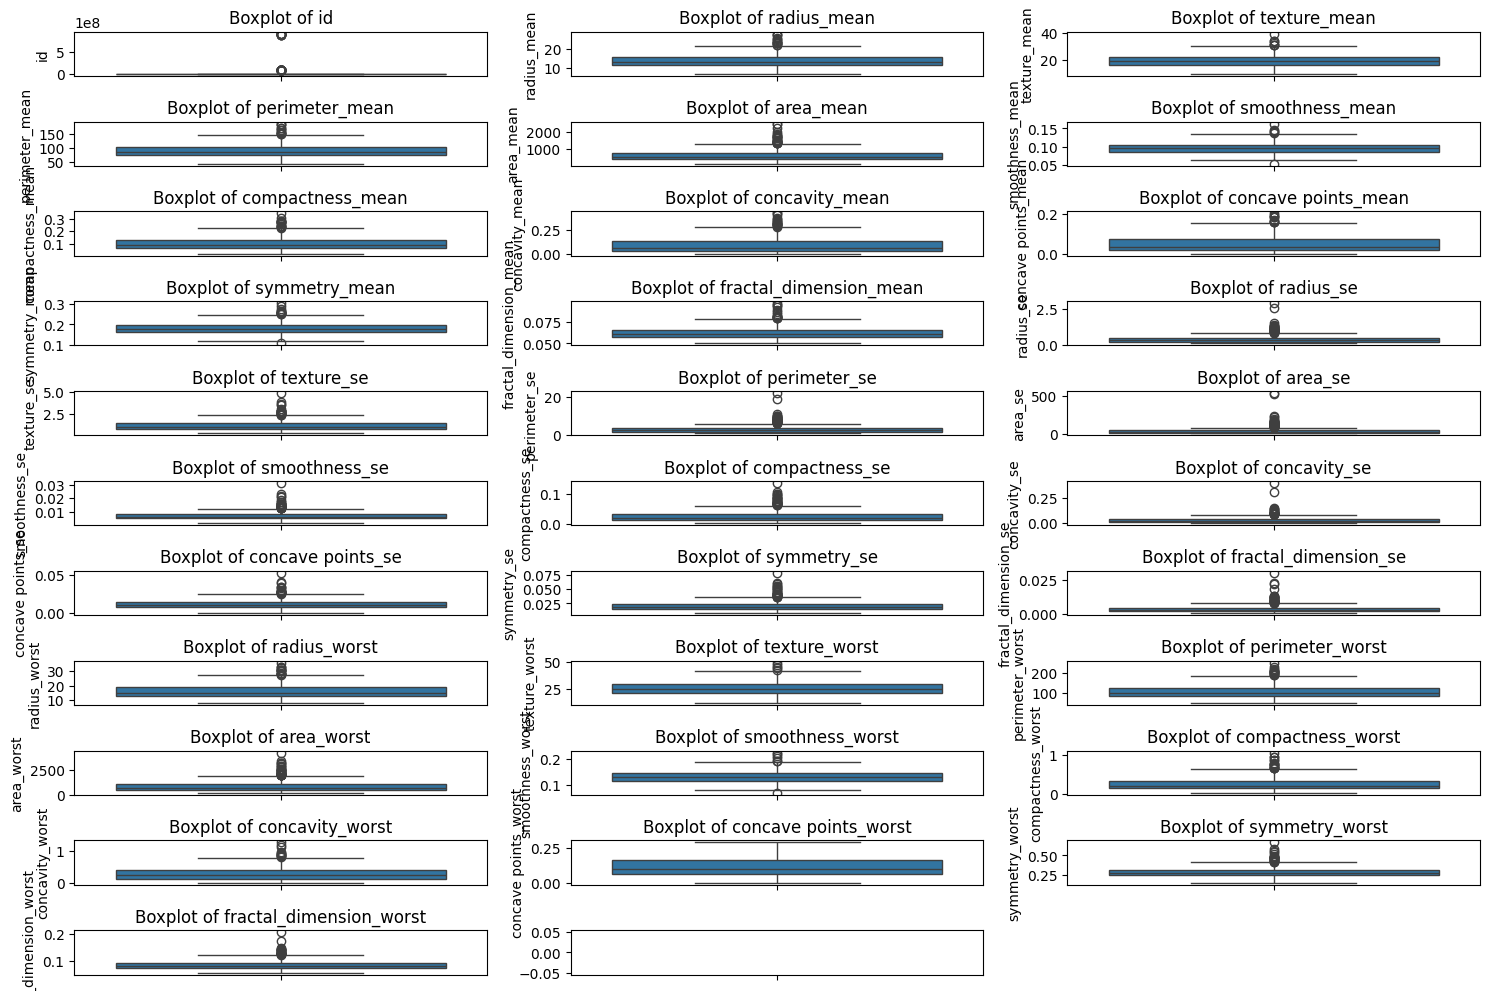

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    # Create a new subplot for each column
    # Adjust the grid size based on number of columns
    plt.subplot(len(numerical_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.savefig('boxplots_numerical.png')
plt.show()

if 'order_protocol' in df.columns and len(numerical_cols) > 0:
    plt.figure(figsize=(12, 8))
    # Select first numerical column as an example
    numerical_col = numerical_cols[0]
    sns.boxplot(x='order_protocol', y=numerical_col, data=df)
    plt.title(f'{numerical_col} by Order Protocol')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('boxplot_by_category.png')
    plt.show()

Categorical data visualization

In [ ]:
# First, define numerical_cols before using it
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Now use numerical_cols in your visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:min(6, len(numerical_cols))], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('numerical_distributions.png')
plt.show()

# Visualize categorical data
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(categorical_cols[:min(6, len(categorical_cols))], 1):
        plt.subplot(2, 3, i)
        top_categories = df[col].value_counts().head(10)
        sns.barplot(x=top_categories.index, y=top_categories.values)
        plt.title(f'Top 10 values - {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('categorical_distributions.png')
    plt.show()

# **III. Data Preparation**






## III.4. Dimensionality Reduction

PCA is used to reduce the number of features in a dataset while retaining most of the original variance. By transforming correlated variables into a smaller set of uncorrelated components, PCA simplifies the dataset, speeds up computation, and can help improve model performance while reducing noise.

### Principal Component Analysis (PCA)

Missing values before PCA:
store_avg_delivery_duration       0
saturation_ratio                  0
subtotal                          0
avg_item_price                    0
order_hour                        0
weather_temp_max                  0
store_primary_category_encoded    0
order_day_of_month                0
total_items                       0
total_outstanding_orders          0
congestion_ratio                  0
dtype: int64
Explained variance ratio: [6.46568296e-01 3.53362484e-01 5.62764815e-05]


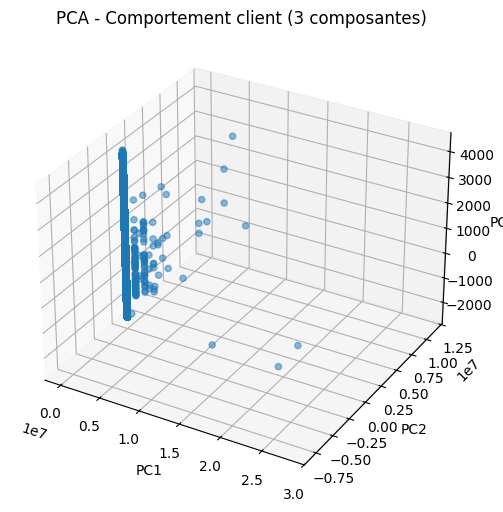

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# X : dataframe standardisée (features pour le BO "comportement client")
# Par exemple : X = df_behavior_scaled[features_for_clustering]

# Check for remaining NaNs
print("Missing values before PCA:")
print(X.isnull().sum())

# Drop rows with NaN values for PCA, as imputation might not have covered all cases
X_cleaned = X.dropna()

# Initialisation du PCA
pca = PCA(n_components=3)  # Initialisation du PCA pour 3 composantes

# Application du PCA
X_pca = pca.fit_transform(X_cleaned)

# Vérification des composantes principales
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Transformation en DataFrame pour visualisation
import pandas as pd
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

# Visualisation 3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA - Comportement client (3 composantes)')

plt.show()

Explained variance ratio: [0.6465683  0.35336248]


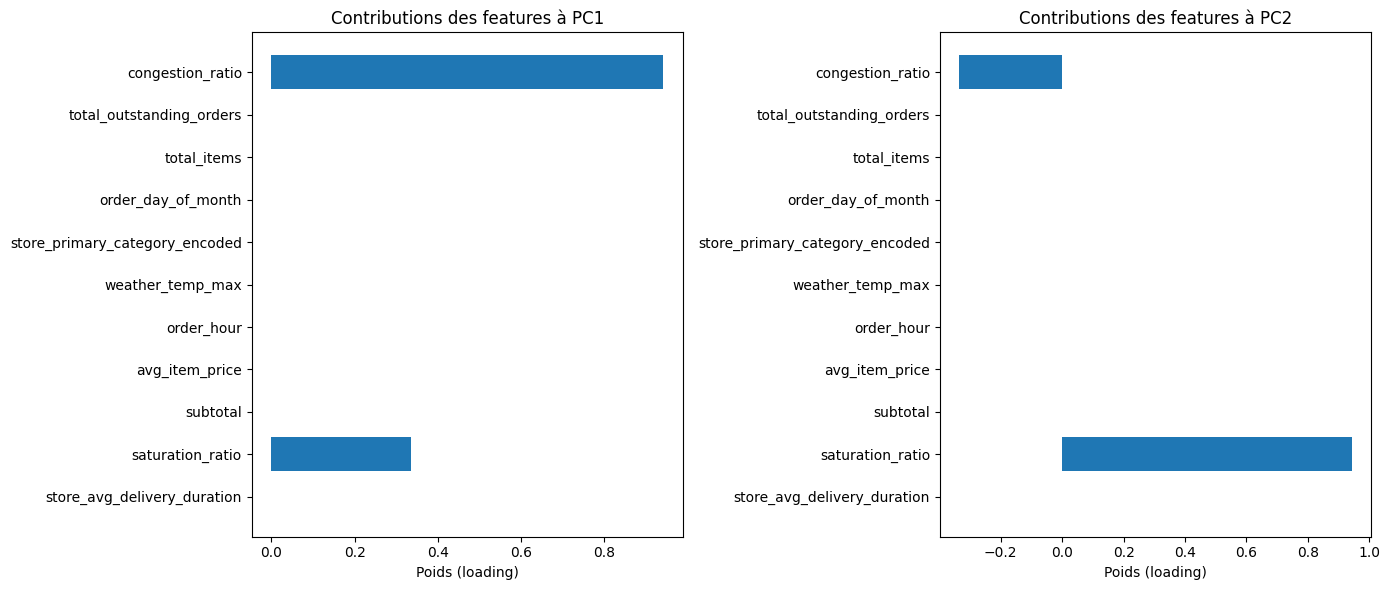

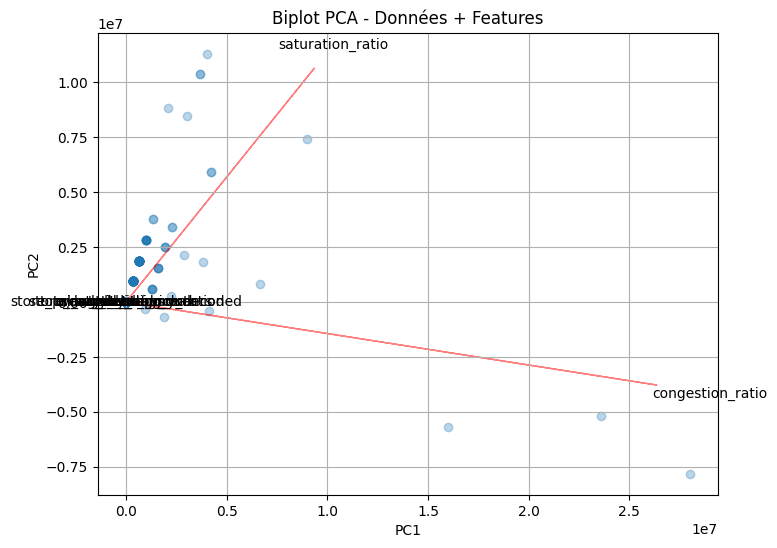

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Suppression des lignes avec NaN
X_cleaned = X.dropna()

# PCA sur 2 composantes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cleaned)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# Transformation en DataFrame PCA
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# -----------------------------
# 1. Barplot des contributions
# -----------------------------
features = X.columns
loadings = pca.components_.T  # colonnes = PC, lignes = features

fig, axes = plt.subplots(1, 2, figsize=(14,6))

for i in range(2):
    axes[i].barh(features, loadings[:, i])
    axes[i].set_title(f"Contributions des features à PC{i+1}")
    axes[i].set_xlabel("Poids (loading)")

plt.tight_layout()
plt.show()

# -----------------------------
# 2. Biplot (features + données)
# -----------------------------
plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.3)

for i, feature in enumerate(features):
    plt.arrow(0, 0,
              loadings[i,0]*max(df_pca['PC1']),
              loadings[i,1]*max(df_pca['PC2']),
              color='red', alpha=0.5)
    plt.text(loadings[i,0]*max(df_pca['PC1'])*1.1,
             loadings[i,1]*max(df_pca['PC2'])*1.1,
             feature, color='black', ha='center', va='center')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot PCA - Données + Features")
plt.grid(True)
plt.show()


In [ ]:
df_weather.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'order_hour', 'order_day_of_week',
       'order_month', 'order_day_of_month', 'time_period', 'is_weekend',
       'is_lunch_peak', 'is_dinner_peak', 'delivery_duration_minutes',
       'delivery_speed', 'avg_item_price', 'price_per_distinct_item',
       'item_diversity_ratio', 'price_range', 'order_size_category',
       'order_value_category', 'congestion_ratio', 'saturation_ratio',
       'store_order_count', 'store_activity_level',
       'store_primary_category_encoded', 'order_protocol_encoded',
       'delivery_speed_encoded', 'order_size_category_encoded',
       'order_value_category_encoded', 'store_activity_level_encoded',
       'time_period_encoded', 'store_avg_delivery_dur

In [ ]:
# Show all columns when printing any DataFrame
pd.set_option('display.max_columns', None)

# Now your df.head() will show all columns
print(df_weather.head())

  market_id          created_at actual_delivery_time  \
0       2.0 2015-02-10 21:49:25  2015-02-10 22:56:29   
1       3.0 2015-01-22 20:39:28  2015-01-22 21:09:09   
2       3.0 2015-01-28 20:30:38  2015-01-28 21:08:58   
3       3.0 2015-02-12 03:03:35  2015-02-12 03:36:20   
4       3.0 2015-02-18 01:15:45  2015-02-18 02:08:57   

                           store_id store_primary_category order_protocol  \
0  f0ade77b43923b38237db569b016ba25                mexican              2   
1  f0ade77b43923b38237db569b016ba25                Unknown              1   
2  f0ade77b43923b38237db569b016ba25                Unknown              1   
3  f0ade77b43923b38237db569b016ba25                Unknown              1   
4  f0ade77b43923b38237db569b016ba25                Unknown              1   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0          1.0    1900.0                 1.0          1400.0          1400.0   
1          1.0    1900.0                

# **IV. Modeling**

# **V. Evaluation**

# **VI. Deployment**